In [11]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_56.csv")
df





,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


In [14]:
# Drop the 'Unnamed: 5' column as it is completely empty
df = df.drop(columns=['Unnamed: 5'])

# Handle missing values in other columns
# Option 1: Fill missing values with a placeholder
df['Region'].fillna('Unknown', inplace=True)
df['IncomeGroup'].fillna('Unknown', inplace=True)

# Option 2: Drop rows with missing values
df = df.dropna(subset=['Region', 'IncomeGroup'])



In [15]:
# Summary statistics for numerical columns
print(df.describe())

# Unique value counts in categorical columns
print(df['Region'].value_counts())
print(df['IncomeGroup'].value_counts())


       Country Code                 Region  IncomeGroup  \
count           265                    265          265   
unique          265                      8            5   
top             ABW  Europe & Central Asia  High income   
freq              1                     58           85   

                                             SpecialNotes TableName  
count                                                 127       265  
unique                                                113       265  
top     Fiscal year end: March 31; reporting period fo...     Aruba  
freq                                                    7         1  
Europe & Central Asia         58
Unknown                       48
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64
High income            85
Upper middle income    54
Lower middl

In [16]:
# Group by 'IncomeGroup' and count countries in each group
income_group_counts = df.groupby('IncomeGroup')['Country Code'].count()
print(income_group_counts)

# Filter for a specific region
sub_saharan_countries = df[df['Region'] == 'Sub-Saharan Africa']
print(sub_saharan_countries)


IncomeGroup
High income            85
Low income             26
Lower middle income    51
Unknown                49
Upper middle income    54
Name: Country Code, dtype: int64
    Country Code              Region          IncomeGroup  \
4            AGO  Sub-Saharan Africa  Lower middle income   
16           BDI  Sub-Saharan Africa           Low income   
18           BEN  Sub-Saharan Africa  Lower middle income   
19           BFA  Sub-Saharan Africa           Low income   
33           BWA  Sub-Saharan Africa  Upper middle income   
34           CAF  Sub-Saharan Africa           Low income   
41           CIV  Sub-Saharan Africa  Lower middle income   
42           CMR  Sub-Saharan Africa  Lower middle income   
43           COD  Sub-Saharan Africa           Low income   
44           COG  Sub-Saharan Africa  Lower middle income   
46           COM  Sub-Saharan Africa  Lower middle income   
47           CPV  Sub-Saharan Africa  Lower middle income   
69           ERI  Sub-Saharan Af

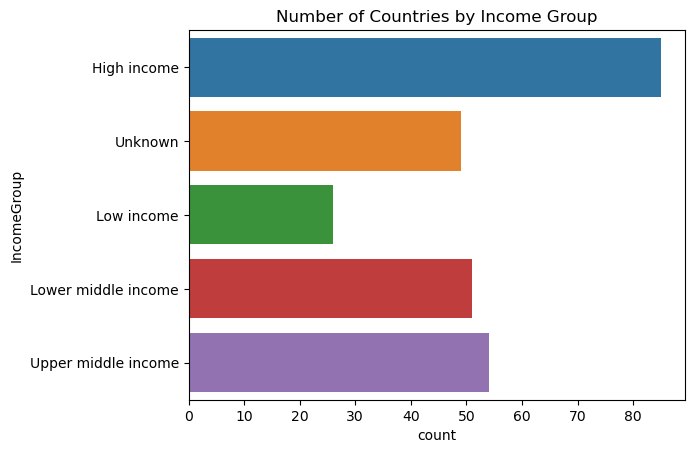

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for income groups
sns.countplot(data=df, y='IncomeGroup')
plt.title('Number of Countries by Income Group')
plt.show()


In [18]:
# Analyze income group distribution across regions
region_income_distribution = df.groupby(['Region', 'IncomeGroup']).size().unstack()
print(region_income_distribution)


IncomeGroup                 High income  Low income  Lower middle income  \
Region                                                                     
East Asia & Pacific                15.0         1.0                 12.0   
Europe & Central Asia              40.0         NaN                  3.0   
Latin America & Caribbean          18.0         NaN                  4.0   
Middle East & North Africa          8.0         2.0                  7.0   
North America                       3.0         NaN                  NaN   
South Asia                          NaN         1.0                  6.0   
Sub-Saharan Africa                  1.0        22.0                 19.0   
Unknown                             NaN         NaN                  NaN   

IncomeGroup                 Unknown  Upper middle income  
Region                                                    
East Asia & Pacific             NaN                  9.0  
Europe & Central Asia           NaN                 15.0  
Lat

In [19]:
# Example of ensuring proper formatting
df['Country Code'] = df['Country Code'].str.upper()  # Ensure country codes are uppercase


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode categorical data for clustering
df_encoded = df[['Region', 'IncomeGroup']].apply(LabelEncoder().fit_transform)

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_encoded)
df['Cluster'] = kmeans.labels_
print(df[['Country Code', 'Cluster']])


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


    Country Code  Cluster
0            ABW        1
1            AFE        0
2            AFG        0
3            AFW        0
4            AGO        0
..           ...      ...
260          XKX        2
261          YEM        1
262          ZAF        0
263          ZMB        0
264          ZWE        0

[265 rows x 2 columns]


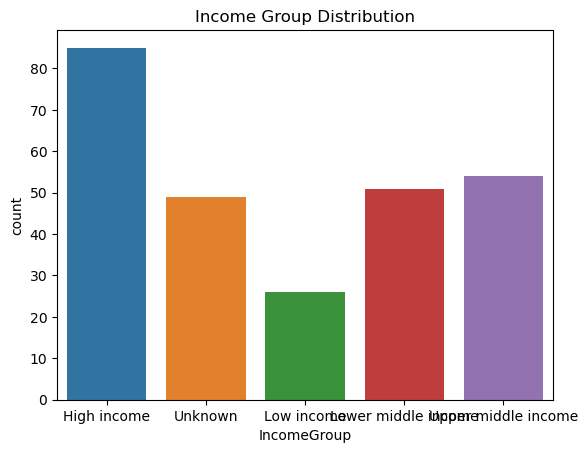

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualize income group distribution
sns.countplot(data=df, x='IncomeGroup')
plt.title('Income Group Distribution')
plt.show()


In [23]:
# Export cleaned dataset
df.to_csv('final_cleaned_data.csv', index=False)
print("Dataset saved as 'final_cleaned_data.csv'")


Dataset saved as 'final_cleaned_data.csv'


In [24]:
# Export cleaned dataset
df.to_csv('final_cleaned_data.csv', index=False)
print("Dataset saved as 'final_cleaned_data.csv'")


Dataset saved as 'final_cleaned_data.csv'


In [26]:
df1=pd.read_csv("final_cleaned_data.csv")

In [27]:
df1

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Cluster
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,1
1,AFE,Unknown,Unknown,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,0
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,0
3,AFW,Unknown,Unknown,"22 countries, stretching from the westernmost ...",Africa Western and Central,0
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,0
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,2
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",1
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,0
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,0
